In [1]:
from typing import List
from collections import namedtuple
import time
import matplotlib.pyplot as plt

In [2]:
class Point(namedtuple("Point", "x y")):
    def __repr__(self) -> str:
        return f'Point{tuple(self)!r}'


class Rectangle(namedtuple("Rectangle", "lower upper")):
    def __repr__(self) -> str:
        return f'Rectangle{tuple(self)!r}'

    def is_contains(self, p: Point) -> bool:
        return self.lower.x <= p.x <= self.upper.x and self.lower.y <= p.y <= self.upper.y


class Node(namedtuple("Node", "location left right")):
    """
    location: Point
    left: Node
    right: Node
    """
    def __repr__(self):
        return f'{tuple(self)!r}'


class KDTree:
    """k-d tree"""

    def __init__(self):
        self._root = None
        self._n = 0

    def insert(self, p: List[Point]):
        """insert a list of points"""
        def insert_rec(p: List[Point],depth):
            if len(p) == 0:
                return None
            # Select sorting dimension
            axis = depth % 2 # Take the remainder of the depth, the value is 0 or 1 , which means x-axis or y-axis respectively
            p_sorted = sorted(p, key= lambda p: p[axis])
            # Get the median index
            mid_idx = len(p_sorted) // 2
            # create a node
            self._root = Node(p_sorted[mid_idx],insert_rec(p_sorted[:mid_idx], depth+1),insert_rec(p_sorted[mid_idx+1:], depth+1))
            return self._root
        return insert_rec(p,0)
            

    def range(self, rectangle: Rectangle) -> List[Point]:
        """range query"""
        def range_rec(node:Node, depth, r:Rectangle):
            if node is None:
                return []
            axis = depth % 2
            result = []
            if r.is_contains(node.location):
                result.append(node.location)
            if rectangle.lower[axis] <= node.location[axis]:
                result.extend(range_rec(node.left, depth+1, rectangle))
            if node.location[axis] <= rectangle.upper[axis]:
                result.extend(range_rec(node.right, depth+1, rectangle))
            return result
        
        return range_rec(self._root, 0, rectangle)


def time_naive(i):
    points = [Point(x, y) for x in range(i) for y in range(i)]
    rectangle = Rectangle(Point(500, 500), Point(504, 504))
    start = int(round(time.time() * 1000))
    result1 = [p for p in points if rectangle.is_contains(p)]
    end = int(round(time.time() * 1000))
    time_result_naive = end - start
    return time_result_naive

def time_kd(i):
    points = [Point(x, y) for x in range(i) for y in range(i)]
    rectangle = Rectangle(Point(500, 500), Point(504, 504))
    kd = KDTree()
    kd.insert(points)
    start = int(round(time.time() * 1000))
    result2 = kd.range(rectangle)
    end = int(round(time.time() * 1000))
    time_result_kd = end - start
    return time_result_kd


In [3]:
nodes_number = [10,50,100,500,1000,5000]
time_naive_list = []
time_kd_list = []
nodes_number_x = []
for n in nodes_number:
    time_naive_list.append(time_naive(n))
    time_kd_list.append(time_kd(n))
    nodes_number_x.append(n**2)

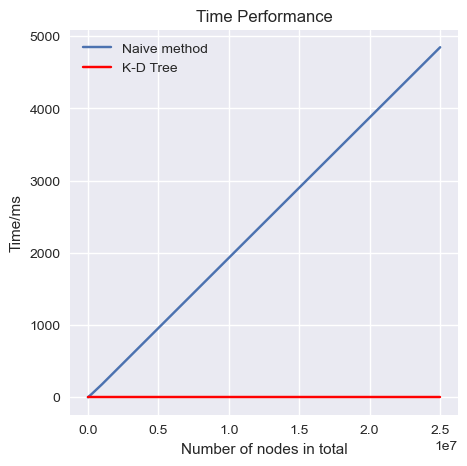

In [4]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(
    nodes_number_x,
    time_naive_list,
    label='Naive method'

)
ax.plot(
    nodes_number_x,
    time_kd_list,
    label='K-D Tree',
    color='red'
)
ax.set_title('Time Performance')
ax.set_xlabel('Number of nodes in total')
ax.set_ylabel('Time/ms')
ax.legend()

In [5]:
def time_naive_1(start, i):
    points = [Point(x, y) for x in range(1000) for y in range(1000)]
    rectangle = Rectangle(Point(start,start), Point(start + i, start + i))
    start = int(round(time.time() * 1000))
    result1 = [p for p in points if rectangle.is_contains(p)]
    end = int(round(time.time() * 1000))
    time_result_naive = end - start
    return time_result_naive

In [6]:
def time_kd_1(start, i):
    points = [Point(x, y) for x in range(1000) for y in range(1000)]
    rectangle = Rectangle(Point(start, start), Point(start + i, start + i))
    kd = KDTree()
    kd.insert(points)
    start = int(round(time.time() * 1000))
    result2 = kd.range(rectangle)
    end = int(round(time.time() * 1000))
    time_result_kd = end - start
    return time_result_kd

In [7]:
nodes_number_1 = [5,10,50,100,150]
nodes_number_1_x = []
for n in nodes_number_1:
    nodes_number_1_x.append(int(n**2))

In [8]:
time_naive_list_1 = []
time_kd_list_1 = []
for n in nodes_number_1:
    time_naive_list_1.append(time_naive_1(500,n))
    time_kd_list_1.append(time_kd_1(500,n))


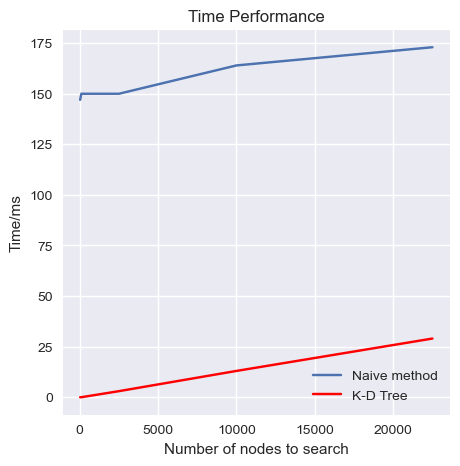

In [9]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(
    nodes_number_1_x,
    time_naive_list_1,
    label='Naive method'

)
ax.plot(
    nodes_number_1_x,
    time_kd_list_1,
    label='K-D Tree',
    color='red'
)
ax.set_title('Time Performance')
ax.set_xlabel('Number of nodes to search')
ax.set_ylabel('Time/ms')
ax.legend()